# **1)군집화**  
### 1-1)비지도학습  
- 라벨이 없는 데이터 사용 -> 모델의 성능을 명확히 파악하기 힘듦
- 데이터 사이의 패턴이나 알고리즘 파악하여 학습  
- 목표가 명확하기보다 데이터에 내제된 구조나 새로운 특성을 찾는 등 목적을 수행하기에 적합   
 1. 패텅이 아직 알려지지 않은 경우  
 2. 패턴이 계속 변하는 경우  
 3. 열린 문제 해결, 지식 일반화  

### 1-2)군집화  
- *군집화: 비슷한 특성을 가진 그룹으로 나누는 비지도 학습 기법  
  *군집: 유사한 데이터들의 집합   
- **종속변수 설정 X**, 데이터 내부의 패턴 인식 -> **비지도 학습**  
- 군집화의 목표  
 1. **응집도** 최대화: 같은 군집에 속하는 데이터끼리 최대한 비슷하게 함  
 2. **분리도** 최대화: 서로 다른 군집은 최대한 분리되도록 함.  
- 군집화의 기본 과정: 
 1. 피처 선택 또는 추출-군집화에 사용할 데이터의 특징 선택  
 2. 군집화 알고리즘 선택-데이터의 특성과 목표에 따라 선택  
 3. 군집 유효성 검증  
 4. 결과 해석-각 군집이 지닌 특성 분석 및 해석  

# **2)군집화를 위한 데이터를 준비**  
### 2-1)군집화의 주요 고려사항  
1. 변수 유형 이해  
- 군집화에 사용될 피처의 종류와 특성 이해  
- 변수 종류(연속/명복형), 변수 개수에 따라 달라지는 알고리즘  
2. 거리/유사도 정의와 측정  
- 데이터간의 거리나 유사도를 기반으로 그룹 형성 -> 거리 측정 방법에 대한 정의 중요
3. 차원 축소  
- 모델의 성능을 향상시키기 위해 유사한 변수들을 묶어 처리하는 차원 축소를 고려해야 함   
- 변수가 많아질수록 모델이 복잡해지고, 효율성과 성능이 떨어질 수 있음  
- 차원 축소를 통해 유사한 변수를 통합하거나, 필요 없는 변수를 제거  
### 2-2)변수 유형 이해  
1. 연속형 변수
 - 수치로 측정 가능한 변수  
 - 거리 측정: 유클리디안 거리, 맨하탄 거리 등  
 - 적합한 알고리즘: k-means, 계층적 군집화 등  
 - **스케일링 필수** 큰 값의 변수가 지배적 영향  
2. 명목형 변수  
 - 범주로 구분되는 변수  
 - 거리 측정: 해밍 거리, 자카드 거리 등  
 - 적합한 알고리즘: k-modes, 계층적 군집화  
 - 원-핫 인코딩 또는 더미변수 변환  
3. 혼합형 변수  
 - 연속형+명목형  
 - 적합한 알고리즘: k-prototypes, gower distance 기반 계층적 군집화  
 - 각 변수 유형에 맞는 거리 함수 조합   

### 2-3)거리/유사도 정의와 측정  
1. 유클리디안 거리  
$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$  
- 가장 일반적인 거리 측정 방법  
- 직선거리, **k-means**에서 주로 사용  
2. 맨하탄 거리  
$d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^n |x_i - y_i|$  
- 각 차원의 차이의 절댓값의 합  
-**이상치에 덜 민감**  
3. 코사인 유사도  
$\text{similarity} = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \times ||\mathbf{y}||}$  
- 벡터 간의 각도 측정  
- 텍스트 데이터나 고차원 데이터에 효과적  

[연결 방법]  
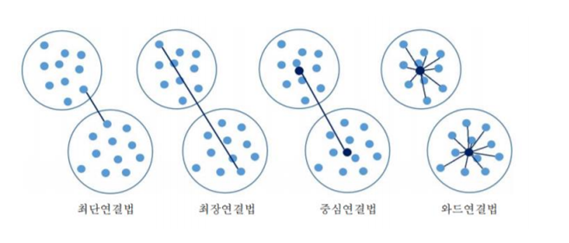 
- 계층적 군집화에서 두 군집 간의 거리를 계산하는 방식들, 군집 간 거리 측정 기준이 다름  
1. single linkage(단일 연결법/최단 연결법):   
   - **군집 A와 B 사이의 가장 가까운 두 점 간 거리**  
   - 고립된 군집을 찾는데 중점  
   - 이상치에 취약(이상치가 한 클러스터에 속하면 해당 클러스터와 가장 가까운 다른 클러스터와도 가까운 거리에 있게 됨 -> 다른 클러스터들도 잘못된 클러스터링을 유발)  
2. complete linkage(완전 연결법/최장 연결법)  
   - **군집 A와 B 사이의 가장 먼 두 점 간 거리**
   - 군집에서 하나씩 관측값을 뽑았을 때 나타날 수 있는 거리의 최댓값으로 측정하여 가장 유사성이 큰 군집으로 병합해 나가는 방법  
   - 군집들의 내부 응집성에 중점  
   - 이상치에 민감  
3. average linkage(평균 연결법)  
   - **군집 A와 B의 모든 점 쌍 사이 거리의 평균**  
   - **모든 항목**에 대한 거리 평균  
   - 이상치에 덜 민감  
   - 계산량이 불필요하게 많아질 수 있음  
4. centroid method(중심 연결법)  
   - **각 군집의 중심점(centroid) 간의 거리**  
   - 두 군집이 결합될 때 새로운 군집의 평균은 가중평균을 통해 구함  
   - 시간이 오래 걸림  
   - 덴드로그램에서 거리 축이 위에서 아래로 줄어드는 inversion 이 발생할 가능성 (?)  
5. median(중앙 연결법)
   - **두 군집을 합친 뒤의 중심점과 기존 군집의 중심점 간의 거리** 기반  
   - 군집간의 거리를 두 군집 내 **모든 샘플의 중앙값**으로 정의 -> 극단값 영향 적음  
   - 기하학적 구조를 파악하기는 어려움  
6. Ward's Procedure(Ward 연결법)  
   - 군집 내 제곱합(SSE)이 증가하지 않도록 병합  
   - 군집의 병합 후 군집 내 SSE(오차제곱합)의 증가분이 최소인 것을 선택  

### 2-4)차원 축소  
- 차원의 저주: 피처 공간이 너무 커서 알고리즘이 데이터를 효과적/효율적으로 훈련할 수 없는 현상  
  **고차원일수록** 모든 점이 비슷하게 멀어져, 거리 가반 알고리즘의 분별력이 감소 -> 차원 축소 필요  
- **차원 = 변수의 개수** -> 차원 축소 = 변수 개수 줄이는 것  
- **선형 투영** : 고차원 공간에서 저차원 공간으로 선형적으로 데이터를 투영  ex) 주성분 분석(PCA), 특잇값 분해(SVD), 랜덤 투영   
- **매니폴드 학습(비선형 차원 축소)** : 유클리드 거리가 아닌 데이터 포인트들 사이의 곡선 거리를 고려하며 학습  ex) t-SNE, UMAP, Isomap  

[**PCA**]  
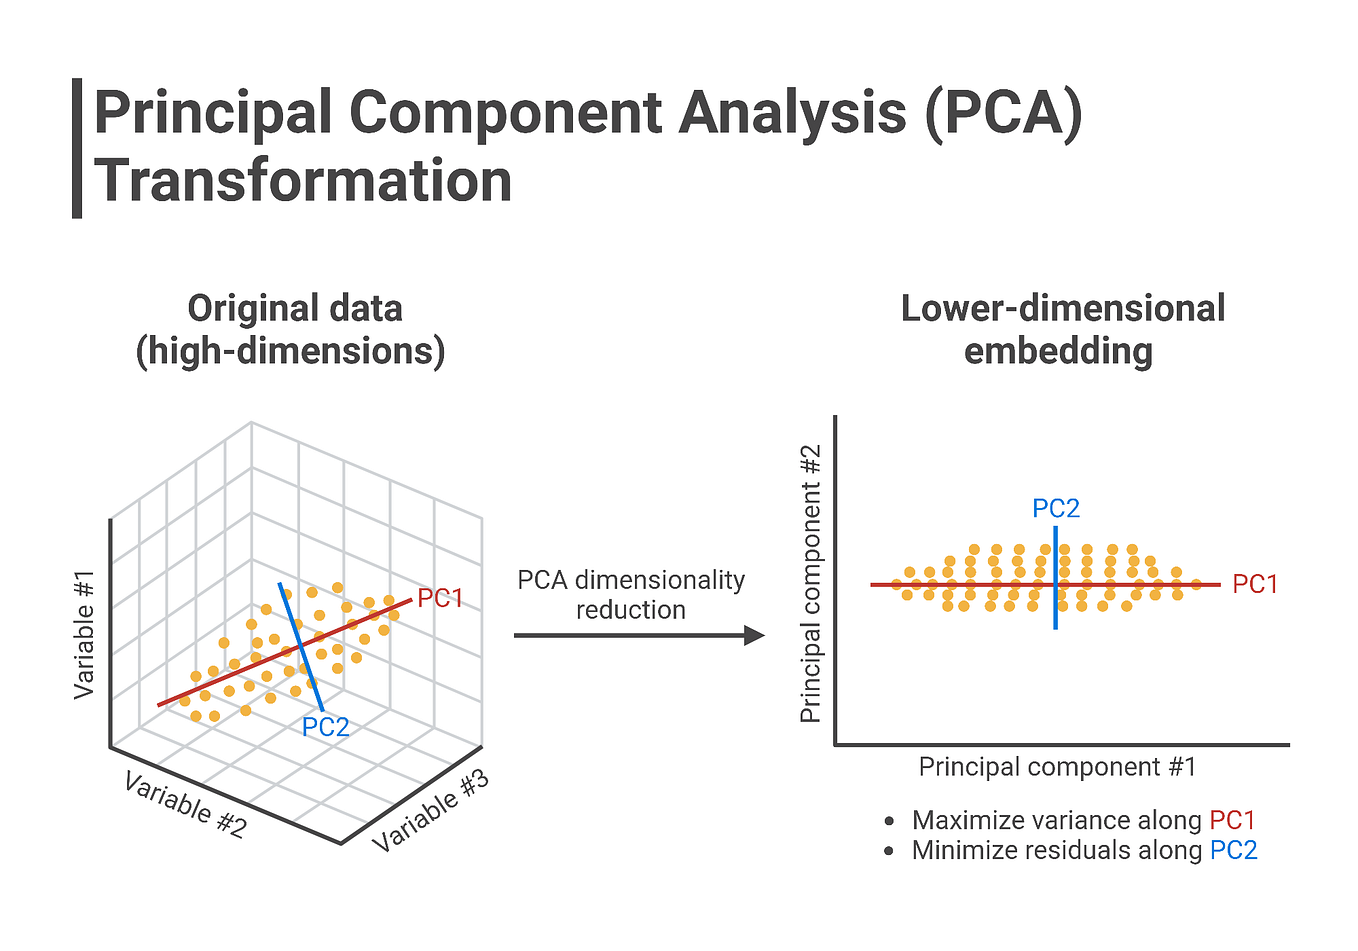
- 목적 : 다차원 데이터에서 가장 **정보량(분산)이 큰 방향**을 찾고, 그 방향을 기준으로 데이터를 투영하여 차원을 줄이는 것  
- 분산을 최대한 보존하면서 차원을 줄여 시각화와 분석을 용이하게 만듬
- 원본의 고차원 데이터에서 최대 분산 방향을 찾아 상관관계를 감소시키고, 저차원 공간에 이들을 투영 -> 새로 파생된 성분: **주성분**    
 ```python   
from sklearn.decomposition import PCA  
pca = PCA(n_components=주성분개수)    
```    
1. `n_components` (주성분 개수)  
2. `whiten` (데이터 정규화)  
3. `random_state` (랜덤 시드)  

- `explained_variance_ratio_` : 각 주성분이 설명하는 **분산 비율**  
- `components_` : **주성분 벡터** (원본 특성들의 가중합), 어떤 원본 특성이 각 주성분에 얼마나 기여하는지 표시   
- `n_components_` : **실제 선택된 주성분 개수** , 분산 비율로 설정할 수 있음  
ex) 
```python  
pca = PCA(n_components=0.95) 
pca.fit(data)
print(f"필요한 주성분: {pca.n_components_}개")  
``` 
*주의*  
1. **표준화 필수**: PCA 사용 전 반드시 데이터 표준화 수행  
2. **결측값 처리**: 결측값이 있으면 사용 불가  
3. **해석의 어려움**: 주성분은 원본 특성들의 조합이라 직관적 해석이 어려움  
4. **정보 손실**: 차원축소 과정에서 일부 정보가 손실됨  


# **3)군집화 알고리즘**  
### 3-1)계층적 군집화  
- 계층적 군집화 : 데이터 간의 유사성을 기반으로 트리 구조(dendrogram)를 형성하며, 상향식 또는 하향식 방식으로 군집을 형성해 나가는 방법  
- 계층적 군집화 알고리즘은 데이터셋의 관측치를 사용해 덴드로그램을 만듬  
  *덴드로그램  
  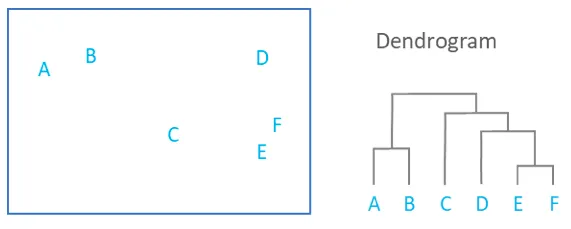  
  Dendrogram의 **수직축**(높이)=두 군집이 병합될 때의 **군집 간 거리(유사성)**  
- 군집의 개수를 사전에 설정하지 않음  
- 상향식 - 응집형 계층적 군집화  /  하향식 - 분리형 계층적 군집화  

#### 3-1-1)응집형/분리형 계층적 군집화  
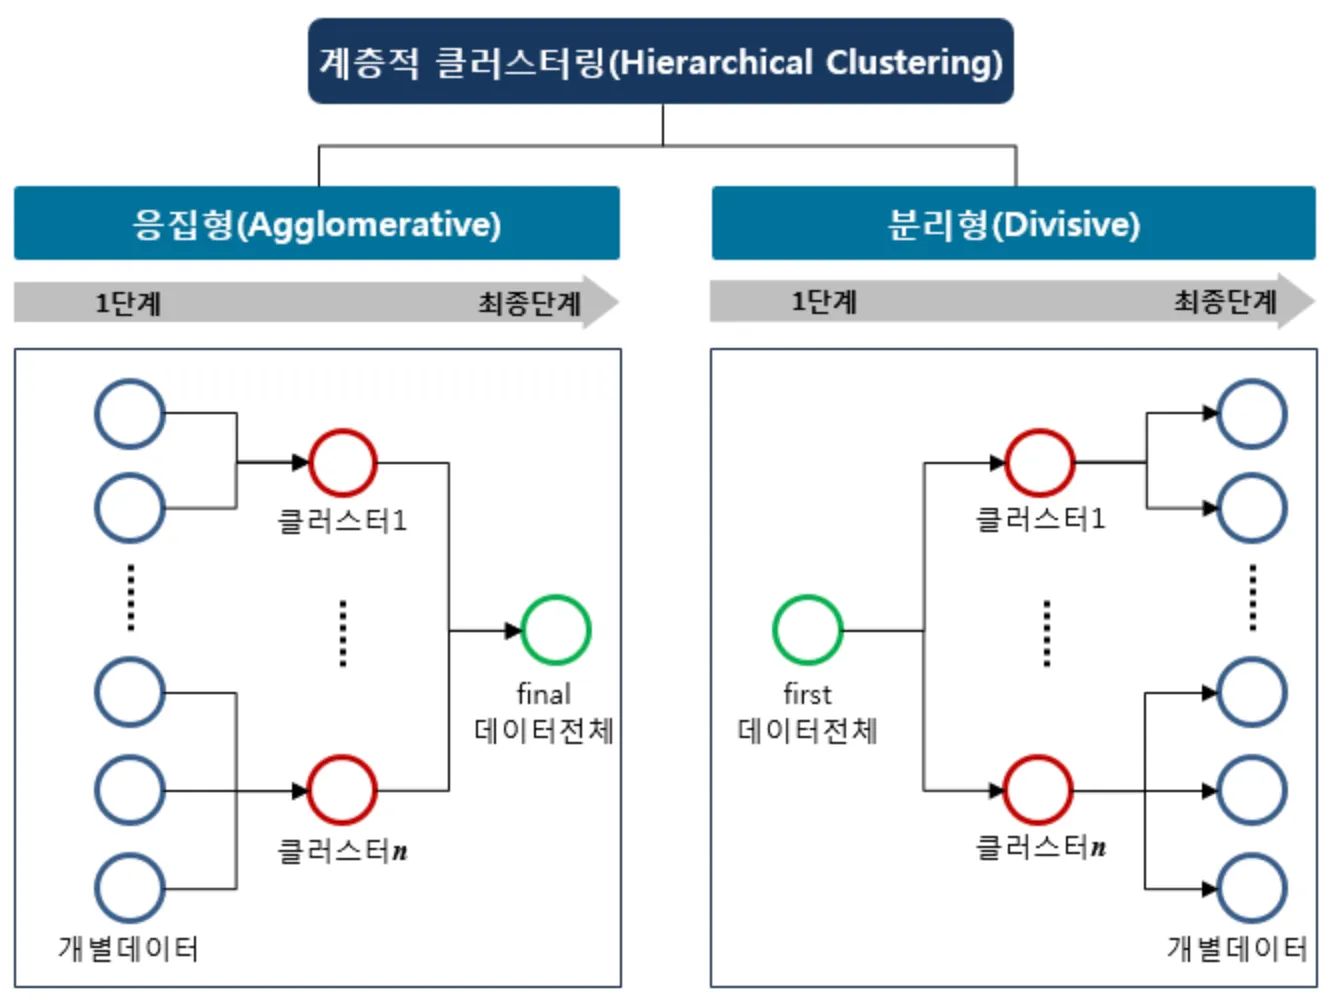  
- **응집형 클러스터링** : 각 샘플이 독립적인 클러스터 -> 하나의 클러스터만 남을 때까지 가장 가까운 클러스터를 병합  
   -'가장 가까운 클러스터'를 어떻게 정의하느냐에 따라 다양한 알고리즘으로 나뉨  
   - **완전 연결** 응집형 군집화  
     1. 거리 행렬 계산  
     2. 단일 클러스터 시작  
     3. 가장 가까운 클러스터 병합  
     4. 거리 행렬 업데이트: 새로 생성된 클러스터와 나머지 클러스터들 간의 거리를 다시 계산하여 거리 행렬을 업데이트  
     5. 반복
- **분할형 클러스터링** : 전체 샘플을 포함하는 하나의 클러스터에서 시작 -> 유사성이 낮은 데이터들을 더 작은 클러스터로 나눔  

### 3-2)k-means  
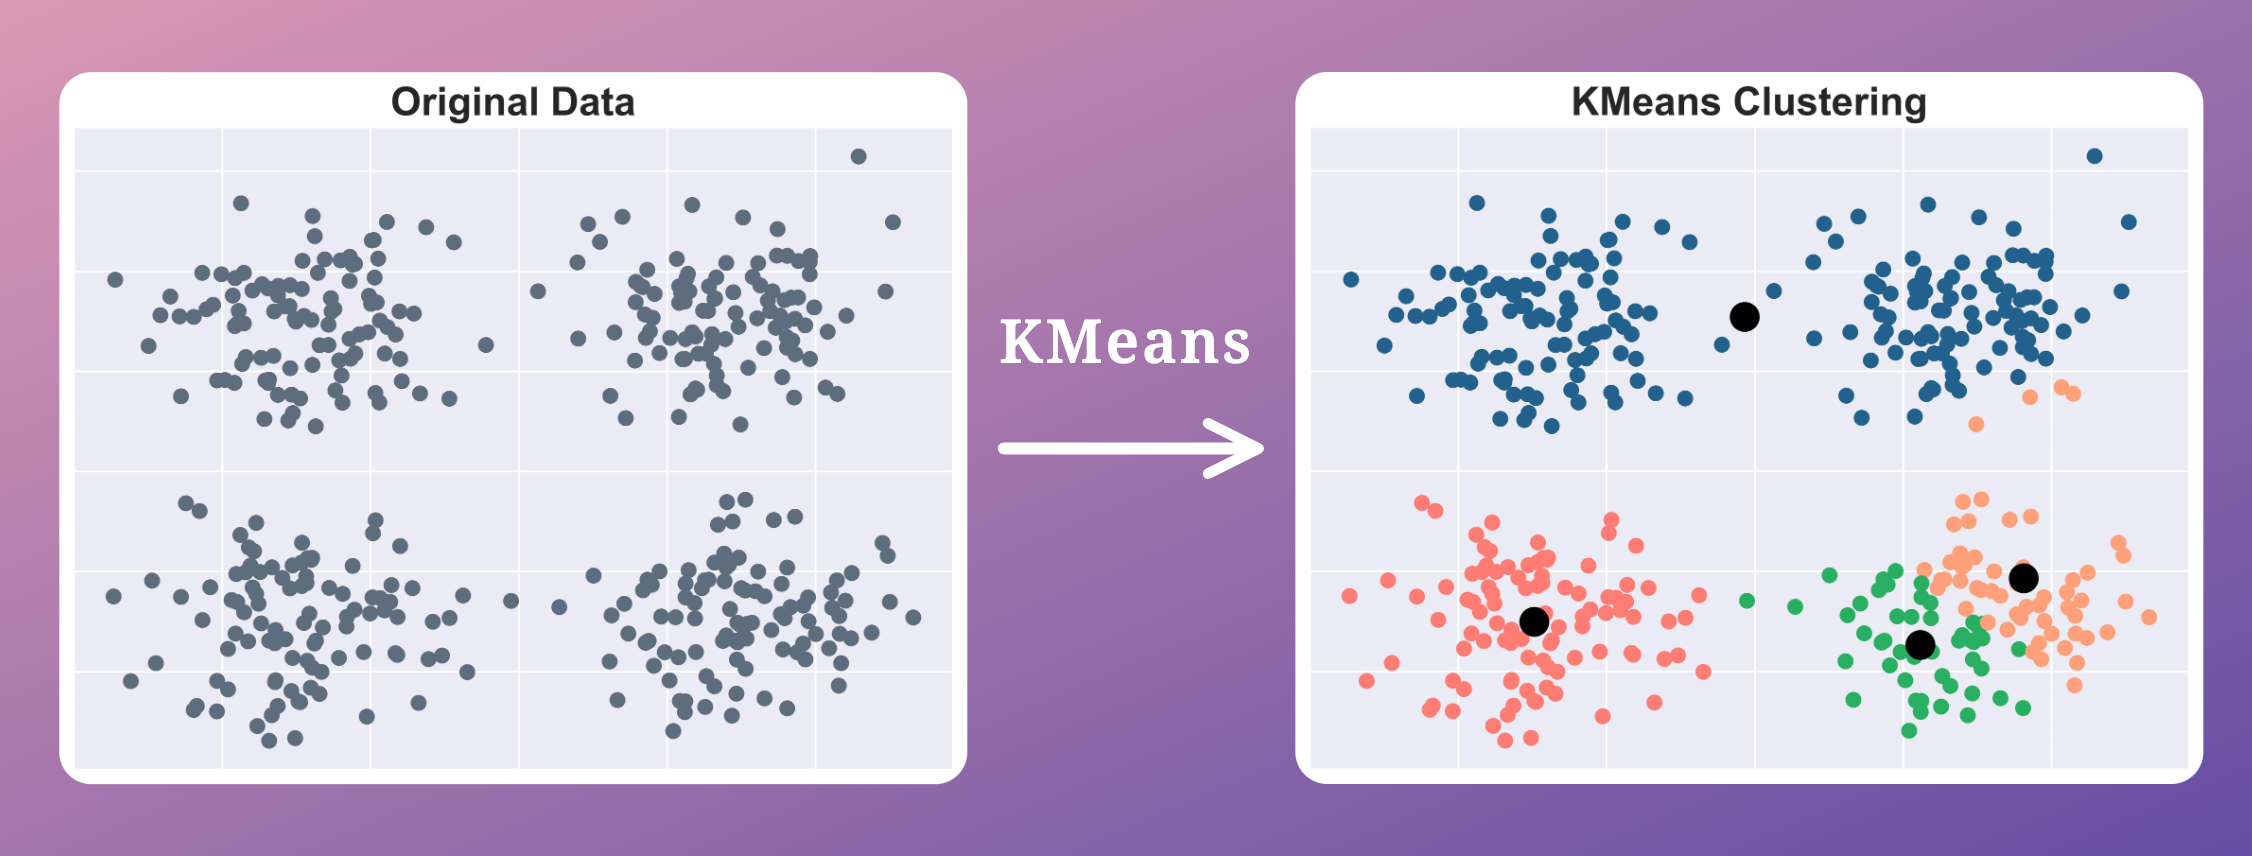  
- 연속적인 특성을 갖는 데이터 샘플들 중에서 군집 중심점(centroid)을 선택해, 해당 **중심에 가장 가까운 데이터**들을 묶어나가는 군집화 기법
- 프로토타입 기반 군집화에 속함  
  *프로토타입 기반 군집화: 각 클러스터의 중심을 대표점(프로토타입)으로 삼아 데이터를 묶는 방식  
**[k-means 주요 단계]**  
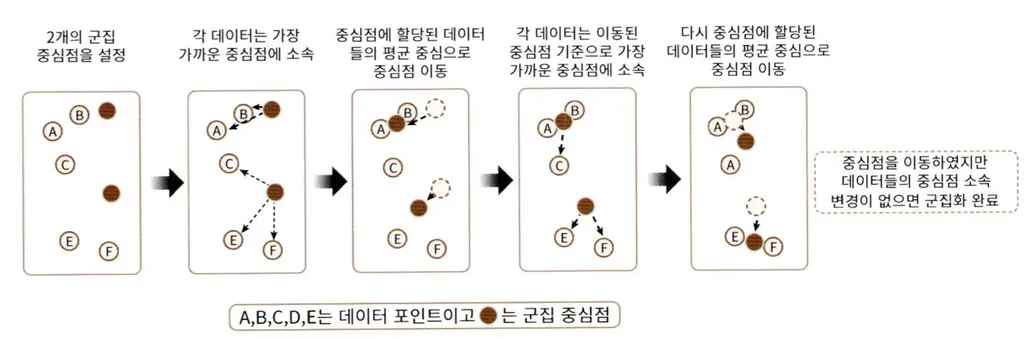  
1. 데이터 표본들 중에서 랜덤하게 $k$개의 중심점(centroid)을 초기 클러스터 중심으로 선택  
2. 각 표본들을 가장 가까운 중심점 $\mu^{(j)}, j \in \{ 1, …, k \}$에 할당 (유클리디안 거리의 제곱 사용)  
3. 각 클러스터에 할당된 표본들의 데이터 평균을 계산하여 중심점 이동  
4. 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차 또는 최대 반복 횟수(max_iter)에 도달할 때까지 반복
**스케일링 필요**  
- 장점: 직관적, 구현 쉬움, 대용량 데이터에도 사용 가능  
- 단점: 초기 centroid 값에 민감함, 군집 수 (k) 결정이 어려움, 아웃라이어에 민감(평균중심), 기하학적인 모양의 군집은 파악하기 어려움  

**[k-means++ 알고리즘]**  
- k-means에서 초기 중심점들을 서로 멀리 떨어진 곳에 위치시켜 더 일관되고 좋은 결과를 도출하는 개선된 초기화 방법 -> 보다 일관되고 좋은 결과 도출 가능  
- k-means++ 알고리즘의 초기화 과정  
  1. 선택한 k개의 중심점을 저장할 빈 집합 $\mathbf{M}$을 초기화  
  2. 입력 샘플에서 첫 번째 중심점 $\mathbf{\mu}^{(i)}$을 랜덤하게 선택하고 $\mathbf{M}$에 할당  
  3. $\mathbf{M}$에 없는 각 샘플 $\mathbf{x}^{(i)}$ 에 대해 $\mathbf{M}$ 에 있는 중심점까지의 최소 제곱 거리 $d(\mathbf{x}^{(i)}, \mathbf{M})^2$ 찾기
  4. 다음 식과 같은 가중치가 적용된 확률 분포를 사용해 다음 중심점 $\mathbf{\mu}^{(p)}$ 을 랜덤하게 선택  
  $\frac{d(\mathbf{\mu}^{(p)}, \mathbf{M})^2}{\sum_i d(\mathbf{x}^{(i)}, \mathbf{M})^2}$  
  5. k개의 중심점을 선택할 때까지 3, 4번 반복  

**[엘보우 방법]**  
- 클래스 내 SSE를 바탕으로 그래프를 활용해 최적 클러스터 개수 k를 추정하는 방법  
- 왜곡이 빠르게 감소하는 지점의 k -> 최적 클러스터의 개수로 추정  
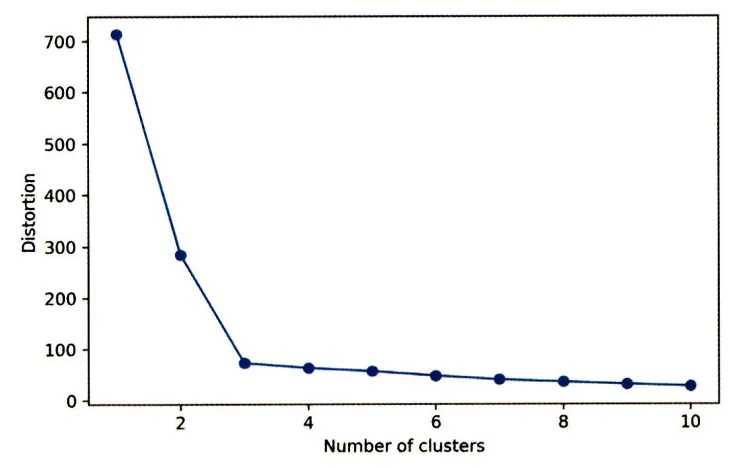  
**그래프에서 급격히 기울기가 변하는 지점(팔꿈치 모양)이 최적의 k값**  
- 장점: 직관적이고 구현이 간단  
- 단점: 그래프가 완만해지는 지점을 확인하고 elbow 포인트를 결정하므로 주관이 개입되거나 모호할 수 있음  

### 3-3)DBSCAN  
- 밀도가 높은 지역의 데이터를 하나의 군집으로 묶고, 밀도 기준을 만족하지 못하는 점은 군집에 포함시키지 않는 군집화 알고리즘  
- 명시적으로 이상치를 지정하여 클러스터링에서 제외, 이상치로부터 자유로운 편  
**[DBSCAN 알고리즘의 주요 단계]**  
1. 샘플 분류 : 핵심샘플-경계샘플-잡음샘플  
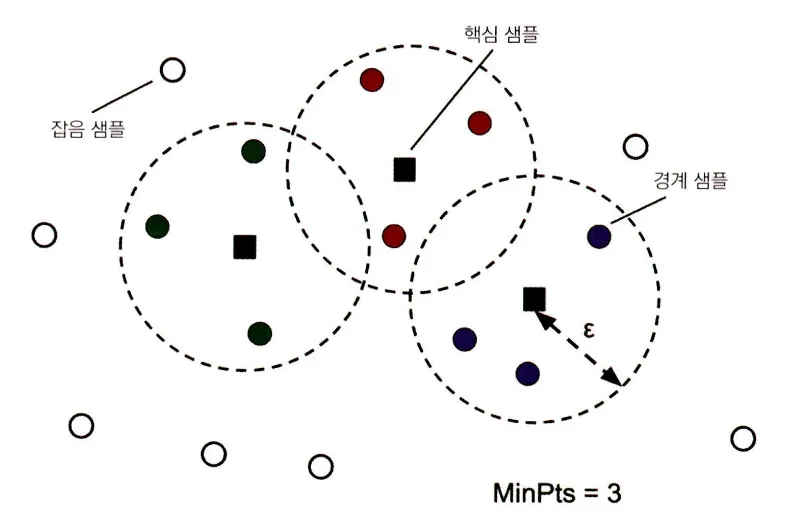  
2. 클러스터 생성  
3. 경계 샘플 할당  
- 하이퍼파라미터:  
-eps : 두 포인트가 이웃이 되기 위한 포인트 사이의 최대 거리  
-min_samples : 한 포인트가 군집이 되기 위한 eps 거리 내 최소 포인트 개수  
- 장점: 기하학적 분포 갖는 데이터도 잘 설명, **이상치에 민감하지 않음**  
- 단점: epsilon과 min_samples 설정에 많은 영향을 받음, 속도 느림, 밀도가 높은 곳에 집중하다 보니 밀도가 낮은 곳의 데이터를 하나의 군집으로 인식하지 못하고 noise point로 구분함, 변수가 늘어날수록 정확도 떨어짐  
**[HDBSCAN]**  
1. 밀도 기반으로 1차 군집화  
2. 거리 기준으로 밀도 기반 군집들을 반복적으로 연결  
- 주요 파라미터  
-`min_cluster_size`: 클러스터 인정을 위한 최소 샘플 수  
-`min_samples`: DBSCAN과 동일 (생략 시 min_cluster_size와 동일)  
- 장점: 여러 밀도 기준으로 반복 수행 -> DBSCAN의 단일 밀도 기준 한계 보완  

### 3-4)Gaussian Mixture Model (GMM)  
- 데이터가 여러 다른 모양의 가우시안 분포로 구성되었다고 가정하고, 각 분포를 클러스터로 인식하는 군집화 방법  
- 단일 분포로 표현하기 어려운 복잡한 형태의 확률 분포를 여러 개의 가우시안 분포를 합쳐서 표현하고자 함  
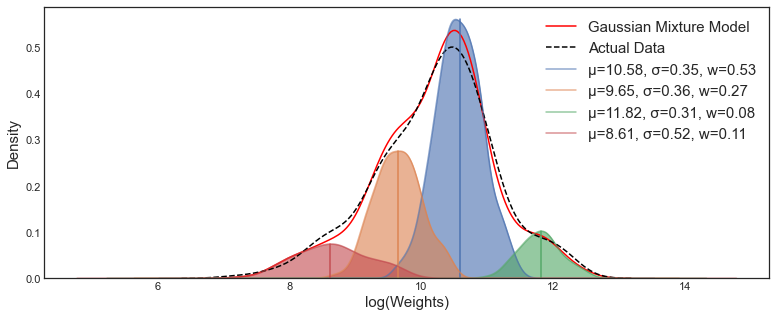  
-  모델 기반 군집화(Model-based Clustering) 방법: 데이터를 생성하는 통계적 모델을 가정, 데이터가 해당 모델로부터 생성되었다는 전제 하에 군집화 수행  
- 전체 데이터 분포를 **여러 확률 분포의 혼합**으로 모델링  
**[기본가정]**  
**관측된 데이터**: 특정 가우시안 확률 분포에 의해 생성됨  
**전체 데이터셋**: 여러 개의 다변량 가우시안 분포가 섞여있음  
**개별 데이터**: 우도에 따라 K개의 가우시안 분포 중 하나에 속함  
**[진행과정]**  
1. 주어진 전체 데이터셋의 분포를 확인  
2. 전체 데이터 셋은 서로 다른 정규 분포 형태의 확률 분포 곡선으로 구성되어 있다고 가정   
3. 전체 데이터셋을 구성하는 여러 개의 정규분포 곡선 추출, **각각의 분포가 하나의 군집**

- 장점: K-means보다 유연하게 다양한 데이터 세트에 잘 적용, 타원형 분포나, 중첩된 군집 구조에서도 좋은 성능  
- 단점: 수행시간이 오래 걸림, 가정한 분포(가우시안 분포)에 맞지 않은 데이터일 경우 계산 복잡도 높아지고 성능 저하  

|구분|k-means|GMM|
|---|---|---|
|기반|중심 기반|확률 분포 기반|
|장점|원형 분포에 효과적, 빠른 수행 속도|다양한 데이터셋에 유연하게 적용, 길쭉한 분포도 준수하게 처리|
|단점|길쭉한 분포에서 최적화 어려움|오래걸림,정규분포 가정 필요| 



# **4)군집화 평가 방법**  
### 4-1)외부평가와 내부평가  
1. 외부평가  
- 정답 레이블이 존재하는 경우에 사용  
- 조정된 랜드 지수(ARI): 군집화 결과와 실제 레이블 간의 일치도를 측정하는 대표적인 지표(-1~1)  
                       **1에 가까울수록** 군집화 결과가 실제 레이블과 거의 완벽하게 일치함을 의미, **0에 가까울수록** 군집화 결과가 무작위와 유사함을 의미  
2. 내부평가  
- 정답 레이블이 없는 경우에 사용  
- 군집 내부 응집도(cohesion)와 군집 간 분리도(separation)를 기반으로 군집의 품질을 정량적으로 측정(데이터 자체의 구조를 기반으로 군집 품질을 판단)  
- 알고리즘 별 내부 평가 지표와 목표:  
    - K-means 알고리즘 : SSE(Sum of Squared Errors)를 최소화하기  
    - GMM : 로그 우도(모델이 주어진 데이터를 얼마나 잘 설명하는지 나타내는 지표)를 최대화하기  
- 대표적인 범용적 지표 : 실루엣 계수(Silhouette Coefficient), 던 지수(Dunn Index)  

### 4-2)실루엣 계수  
- 클러스터 내 샘플들이 얼마나 조밀하게 모여 있는지를 측정하는 도구 -> 군집의 품질 확인  
$s^{(i)} = \frac{b^{(i)} - a^{(i)}}{\max \left\{ b^{(i)}, a^{(i)} \right\}}$  
1. 샘플 $\mathbf{x}^{(i)}$와 동일한 클러스터 내 모든 다른 포인트 사이의 거리를 평균하여 클러스터 응집력(cluster cohesion) $\mathbf{a}^{(i)}$ 를 계산  
2. 샘플 $\mathbf{x}^{(i)}$와 가장 가까운 클러스터의 모든 샘플 간 평균 거리로 최근접 클러스터의 클러스터 분리도 (custer separation) $\mathbf{b}^{(i)}$ 계산  
3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰 값으로 나누어 실루엣 $s^{(i)}$ 를 계산  
- **-1~1** 사이의 값  
- 분리도가 응집도보다 큰 경우 ($b^{(i)} > a^{(i)}$) 이상적인 실루엣 계수인 1에 가까워짐 ->  군집화가 잘 되었다고 평가  
- ```python metric 모델 아래 silhouette_samples 함수를 이용 ```  

### 4-3)Dunn Index  
- **클러스터 간 최소 거리(분리도)**와 **클러스터 내 최대 거리(응집도)**의 **비율**을 계산해 클러스터링의 품질 평가  
$\text{Dunn Index} = \frac{
\min\limits_{i \ne j} \; d(C_i, C_j)}{\max\limits_{1 \le k \le K} \; \delta(C_k)}$  
$d(C_i, C_j)$ : 클러스터 $C_i$와 $C_j$ 사이의 거리(분리도)  
$\delta(C_k)$ : 클러스터 $C_k$ 내의 최대 거리(응집도)  
- 값이 클수록 좋음(분리도 높, 응집도 높)  
- 군집 수가 많아질수록 계산 비용 증가  
- 이상치에 민감하게 반응